In [1]:
import pandas as pd
import numpy as np
import re
import string
import time
from datetime import datetime
from datetime import date
import os

#Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics


# Labelizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize


# Save model
import pickle
import joblib

### Director

In [10]:
gender_as_an_input = 'Yes'
chosen_feature_predicting = 'average_rating_count'
chosen_bin_method = 'quartiles'
chosen_success_class = 'director_class'
chosen_dataset_ratio = 'unbalanced'
chosen_scaling_method = 'None'
default_learning_rate = 0.1
chosen_max_leaf_nodes = 32
default_max_depth = 3
chosen_max_features = None
chosen_random_state = 42

### Movies

In [2]:
# gender_as_an_input = 'Yes'
# chosen_feature_predicting = 'rating_count'
# chosen_bin_method = 'quartiles'
# chosen_success_class = 'movie_class'
# chosen_dataset_ratio = 'unbalanced'
# chosen_scaling_method = 'None'
# default_learning_rate = 0.1
# chosen_max_leaf_nodes = 32
# default_max_depth = 3
# chosen_max_features = None
# chosen_random_state = 42

In [3]:
fileName = '1_Director_Data_Mar-21-2020'
# fileName = '2_Director_Data_Enhanced_May-10-2020'
# fileName = '3_USA_Director_Specific_dataset_May-10-2020'

dataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\'+ fileName +'.csv')

In [4]:
# fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-17-2019.csv'
# dataFileLocation = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Final_Data_Movies_Directors.csv'


# dataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\data1_Data_Movies.csv')
# dataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\data2_Movies_WithAwards.csv')
# dataFileLocation = os.path.join(os.path.realpath(os.path.pardir),'datasets\\data3_USA_Movies_WithAwards.csv')

In [6]:
saveFileToPath = "C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\"

movies_data = pd.read_csv(dataFileLocation)

In [7]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41629 entries, 0 to 41628
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   director_ids              41629 non-null  object 
 1   director_name             41629 non-null  object 
 2   movies_produced           41629 non-null  int64  
 3   average_rating_value      41629 non-null  float64
 4   average_rating_count      41629 non-null  float64
 5   career_Length             41629 non-null  int64  
 6   Gender                    41629 non-null  object 
 7   birthYear                 41629 non-null  int64  
 8   primaryProfession         41629 non-null  object 
 9   knownForTitles            41629 non-null  object 
 10  CareerStartYear           41629 non-null  int64  
 11  median_inter_event_time   41629 non-null  float64
 12  average_movie_per_year    41629 non-null  float64
 13  average_inter_event_time  41629 non-null  float64
dtypes: flo

In [13]:
def quartile_bin(df,class_feature='rating_value'):
    # Quartile cut into 4 different buckets

    bin_quartiles = ['terrible','poor','average','excellent']
    cutIntoQuartiles = pd.qcut(df[class_feature].to_list(), q=4,labels=bin_quartiles)
    
    print(cutIntoQuartiles.categories)
    
    df[chosen_success_class] = cutIntoQuartiles
    df[chosen_success_class] = df[chosen_success_class].astype(object)
    print('The shape of our dataset before dropping the class feature is:', df.shape)
    df.drop(columns = [class_feature] , inplace = True)
    print('The shape of our dataset after dropping the class feature  is:', df.shape)
    return df

In [14]:
def choose_success_measure(df, bin_method = 'Quartiles', feature = 'rating_value'):
    
    # Stats of the feature
    print('\nDescribing the feature : \n')
    print(df[feature].describe())
    

    
    if (bin_method == 'quartiles'):
        # Quartie bin cuts
        df = quartile_bin(df,feature)
            
    elif(bin_method == 'bin_cut'):
        # Bin cuts
        df = bincuts(df,'rating_value')
        
    elif(bin_method == 'Bin_AsPaper'):
        df[chosen_success_class] = df[feature].apply(success_measure).astype('category')
        
        print('\nShape of the dataset : \n')
        print('\nThe shape of our Movies dataset is:', df.shape)
        df.drop(columns = [feature] , inplace = True)
        print('\nThe shape of our Movies dataset is:', df.shape)
    
    print('\nValue Count of the bucketed class is : \n')
    print(df[chosen_success_class].value_counts())

In [15]:
object_features_to_remove = movies_data.select_dtypes(include = 'object').columns.values.tolist()
object_features_to_remove.remove('Gender')
object_features_to_remove

['director_ids', 'director_name', 'primaryProfession', 'knownForTitles']

In [16]:
print('The shape of our Movies dataset before removing object type features:', movies_data.shape)
# movies_data = movies_data[movies_data.columns.difference(object_features_to_remove)]
movies_data = movies_data.drop(columns= object_features_to_remove)
print('The shape of our Movies dataset after dropping object type features:', movies_data.shape)

The shape of our Movies dataset before removing object type features: (41629, 14)
The shape of our Movies dataset after dropping object type features: (41629, 10)


In [17]:
choose_success_measure(movies_data , bin_method = chosen_bin_method , feature = chosen_feature_predicting)


Describing the feature : 

count     41629.000000
mean       1398.390829
std       11699.252139
min           5.000000
25%          12.670000
50%          34.000000
75%         147.890000
max      690249.000000
Name: average_rating_count, dtype: float64
Index(['terrible', 'poor', 'average', 'excellent'], dtype='object')
The shape of our dataset before dropping the class feature is: (41629, 11)
The shape of our dataset after dropping the class feature  is: (41629, 10)

Value Count of the bucketed class is : 

poor         10477
terrible     10432
excellent    10407
average      10313
Name: director_class, dtype: int64


In [18]:
# def one_hot_encode_gender(df,one_hot_feature = 'Gender'):
#     print('Before one hot encoding , Shape ;', df.shape)
#     # one hot encoding of Gender
#     df = pd.concat([df, pd.get_dummies(df[one_hot_feature],prefix= one_hot_feature,dtype = int)],axis=1)
#     df.drop([one_hot_feature],axis=1, inplace=True)
#     print('After one hot encoding , Shape ;', df.shape)
#     df.head(2)
#     return df

# movies_data = one_hot_encode_gender(movies_data)

## labelize Gender

In [19]:
lb = preprocessing.LabelBinarizer()
movies_data['Gender'] = lb.fit_transform(movies_data['Gender'])

In [20]:
# #Using Pearson Correlation
# plt.figure(figsize=(12,10))
# cor = movies_data.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [21]:
movies_data.columns

Index(['movies_produced', 'average_rating_value', 'career_Length', 'Gender',
       'birthYear', 'CareerStartYear', 'median_inter_event_time',
       'average_movie_per_year', 'average_inter_event_time', 'director_class'],
      dtype='object')

# PCA

In [105]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
X = movies_data.drop(columns = [chosen_success_class,'Gender']).values
# Separating out the target
y = movies_data[chosen_success_class].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [106]:
from sklearn.decomposition import PCA
# pca = PCA(0.9)
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents)
                           
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4', 'principal component 5','principal component 6'])

In [107]:
X.shape

(41629, 8)

In [108]:
principalDf.shape

(41629, 3)

In [109]:
# principalDf.columns = ['principal component 1', 'principal component 2']

In [110]:
pca.explained_variance_ratio_.sum()

0.7557623708603836

In [111]:
finalPCA_df = pd.concat([principalDf, movies_data[['Gender',chosen_success_class]]], axis = 1)

In [112]:
finalPCA_df['principal component 1'].describe()

count    4.162900e+04
mean    -5.113816e-16
std      1.593013e+00
min     -9.358717e+00
25%     -1.283061e+00
50%     -2.644018e-01
75%      9.217545e-01
max      2.369062e+01
Name: principal component 1, dtype: float64

In [113]:
data_to_be_normalized = finalPCA_df.select_dtypes(include=[np.number])

In [114]:
columnsNormalized = data_to_be_normalized.columns
columnsNormalized

Index(['principal component 1', 'principal component 2',
       'principal component 3', 'Gender'],
      dtype='object')

In [115]:
x = data_to_be_normalized.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_numbers = pd.DataFrame(x_scaled)

In [116]:
normalized_numbers.columns = columnsNormalized

In [117]:
normalized_finalDf  = finalPCA_df.copy()

In [118]:
normalized_finalDf[normalized_numbers.columns] = normalized_numbers.to_numpy()
normalized_finalDf.head()

,principal component 1,principal component 2,principal component 3,Gender,director_class
0,0.368657,0.272285,0.442224,1.0,excellent
1,0.275869,0.216887,0.393469,1.0,excellent
2,0.277037,0.215251,0.388398,1.0,excellent
3,0.291303,0.226250,0.381147,1.0,excellent
4,0.298830,0.205654,0.392323,1.0,excellent


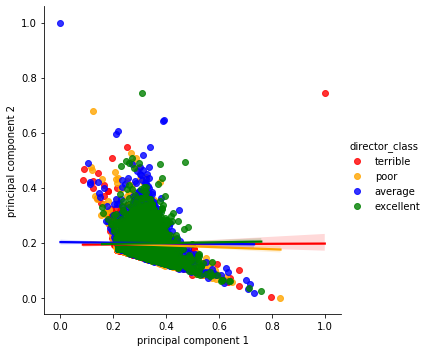

In [119]:
sns.lmplot(data = normalized_finalDf,
           x="principal component 1",
           y="principal component 2", 
           hue=chosen_success_class,
           hue_order = ['terrible','poor','average','excellent'],
           palette = ['red','orange','blue','green'],
          )

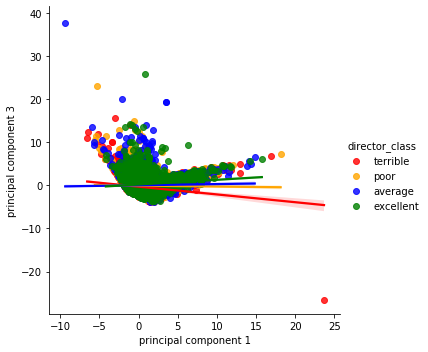

In [120]:
sns.lmplot(data = finalPCA_df,
           x="principal component 1",
           y="principal component 3", 
           hue=chosen_success_class,
           hue_order = ['terrible','poor','average','excellent'],
           palette = ['red','orange','blue','green'],
          )

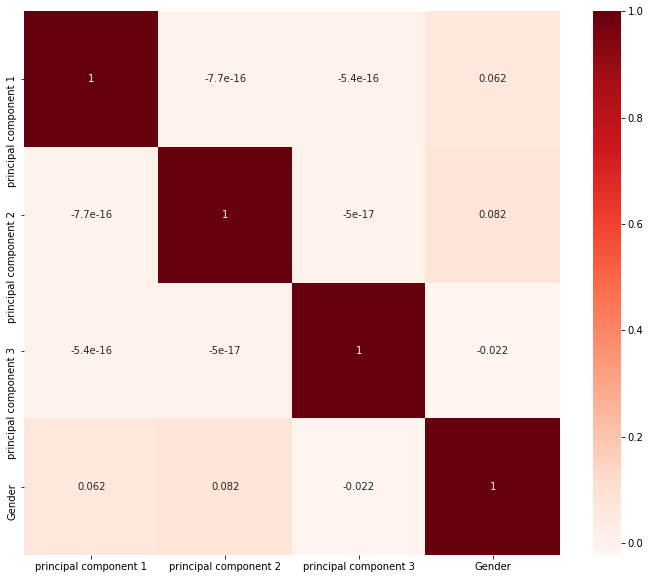

In [121]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = finalPCA_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [122]:
# Function to Plot - Distribution of rating value among male and female. 

def plot_features_WRT_gender(df,columnCriteriaName,columnFeatureName):
    dict={}
    for i in df[columnCriteriaName].value_counts().index:
        dict["{0}_{1}".format(columnFeatureName,i)] = df[(df[columnCriteriaName] == i)][columnFeatureName]
    for k,v in dict.items():
        sns.distplot(v,label=[k])
        plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)

In [123]:
finalPCA_df.describe()

,principal component 1,principal component 2,principal component 3,Gender
count,4.162900e+04,4.162900e+04,4.162900e+04,41629.000000
mean,-5.113816e-16,1.002428e-15,3.445228e-17,0.784021
std,1.593013e+00,1.447376e+00,1.188972e+00,0.411505
min,-9.358717e+00,-9.264207e+00,-2.653303e+01,0.000000
25%,-1.283061e+00,-7.101693e-01,-5.617724e-01,1.000000
50%,-2.644018e-01,-3.010688e-01,8.861172e-02,1.000000
75%,9.217545e-01,5.741315e-01,5.244543e-01,1.000000
max,2.369062e+01,3.798730e+01,3.771679e+01,1.000000


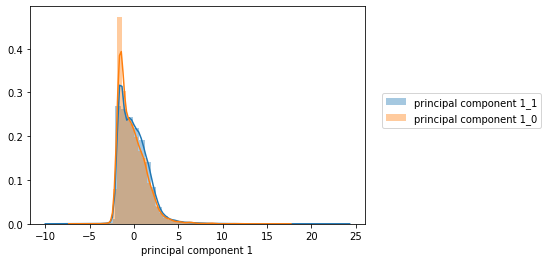

In [124]:
plot_features_WRT_gender(finalPCA_df,"Gender","principal component 1")

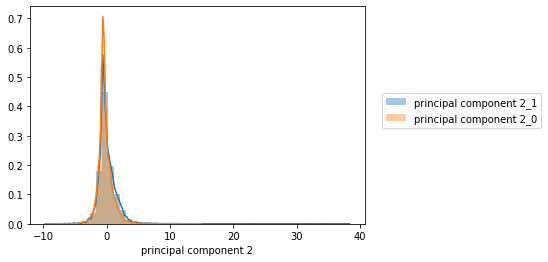

In [125]:
plot_features_WRT_gender(finalPCA_df,"Gender","principal component 2")

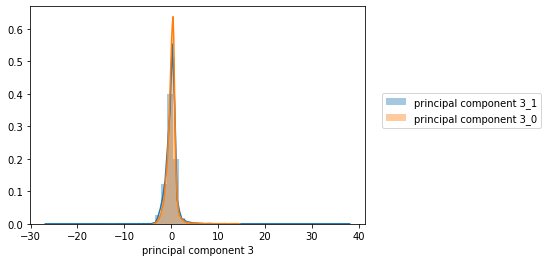

In [126]:
plot_features_WRT_gender(finalPCA_df,"Gender","principal component 3")

# Visualize 2D projection

C:\Users\yuvar\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


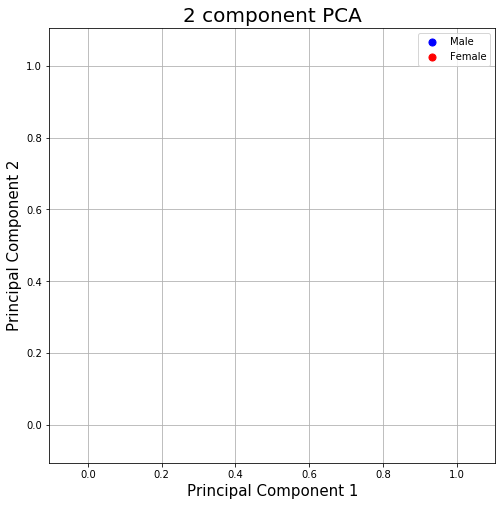

In [128]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
categories = ['Male','Female']
colors = ['b', 'r']
for category, color in zip(categories,colors):
    indicesToKeep = finalPCA_df['Gender'] == category
    ax.scatter(finalPCA_df.loc[indicesToKeep, 'principal component 1']
               , finalPCA_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(categories)
ax.grid()

Notice outlier. Try to remove from main dataset

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
categories = ['Male','Female']
colors = ['b', 'r']
for category, color in zip(categories,colors):
    indicesToKeep = finalDf[target_output] == category
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(categories)
ax.grid()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
categories = ['Male','Female']
colors = ['b', 'r']
for category, color in zip(categories,colors):
    indicesToKeep = finalDf[target_output] == category
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(categories)
ax.grid()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 6', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
categories = ['Male','Female']
colors = ['b', 'r']
for category, color in zip(categories,colors):
    indicesToKeep = finalDf[target_output] == category
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 6']
               , c = color
               , s = 50)
ax.legend(categories)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
features

In [ ]:
pca.components_

# 3 PCA plot

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_zlabel('Principal Component 3', fontsize = 10)
ax.set_title('3 component PCA', fontsize = 20)
categories = ['Male','Female']
colors = ['b', 'r']

for category, color in zip(categories,colors):
    indicesToKeep = finalDf[target_output] == category
    ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(categories)
ax.grid()